# Data Wrangling 

<p>Where are the top 3 popular neighborhoods in Seattle Airbnb?</p>
<p>What is related to higher price?</p>
<p>Does rating affect the price? </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import defaultdict


In [2]:
seattle = pd.read_csv("C:\\Data\\MeiData\\Udacity\\Data Scientist\\Blog Post\\Seattle\\listings.csv")
seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# check all columns in the dataframe and get rid of the ones that are useless
seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [4]:
# create a new dataframe with useful columns
df=seattle[['name','transit','host_since','host_response_time','host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
            'host_listings_count', 'host_total_listings_count','host_verifications','host_has_profile_pic', 'host_identity_verified',
            'neighbourhood_cleansed','neighbourhood_group_cleansed','latitude', 'longitude','street','neighbourhood','is_location_exact',
            'property_type', 'room_type','accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type','amenities','square_feet','price', 
            'weekly_price', 'monthly_price', 'security_deposit','cleaning_fee', 'guests_included', 'extra_people','minimum_nights',
            'maximum_nights','calendar_updated', 'has_availability','availability_30', 'availability_60', 'availability_90','availability_365',
            'number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 
            'review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy',
            'require_guest_profile_picture','require_guest_phone_verification', 'calculated_host_listings_count','reviews_per_month']]

In [5]:
df.head()

,name,transit,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Stylish Queen Anne Apartment,NaN,2011-08-11,within a few hours,96%,100%,f,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,Bright & Airy Queen Anne Apartment,"Convenient bus stops are just down the block, ...",2013-02-21,within an hour,98%,100%,t,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,New Modern House-Amazing water view,A bus stop is just 2 blocks away. Easy bus a...,2014-06-12,within a few hours,67%,100%,f,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,Queen Anne Chateau,NaN,2013-11-06,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",...,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,Charming craftsman 3 bdm house,The nearest public transit bus (D Line) is 2 b...,2011-11-29,within an hour,100%,NaN,f,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


In [16]:
df.shape

(3818, 57)

In [ ]:
df.dtypes

In [ ]:
# check the data type in each column
for col in df.columns:
    print(col)
    print(df[col].value_counts(sort=False, ascending=True))

# Check NaN data

In [ ]:
for col in df.columns:
    print(col)
    print(df[col].isnull().value_counts())

# Explore the data

In [10]:
df['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                         45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                     11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentia

In [18]:
df['neighbourhood'].value_counts()

Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
South Park              2
Pike Market             2
Roxhill                 1
North College Park      1
Fairmount Park          1
Name: neighbourhood, Length: 81, dtype: int64

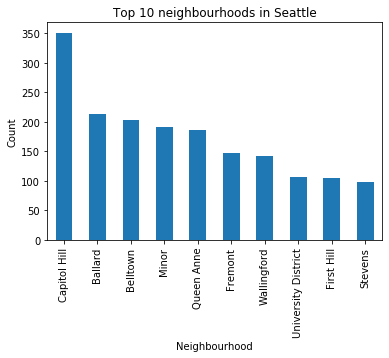

In [54]:
df['neighbourhood'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 neighbourhoods in Seattle')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.show()

### Find out the average price in the top 10 popular communities

use column 'neighbourhood'

In [172]:
df_neighb_clean = df.dropna(subset=['neighbourhood'], axis=0)
df_neighb_price = df_neighb_clean[['neighbourhood','price']]

In [173]:
group1 = df_neighb_price.groupby(['neighbourhood'], as_index=True).agg(count=('price','size'), mean_price=('price','mean'))
group1_count = group1.sort_values(['count'],ascending=False)
group1_count

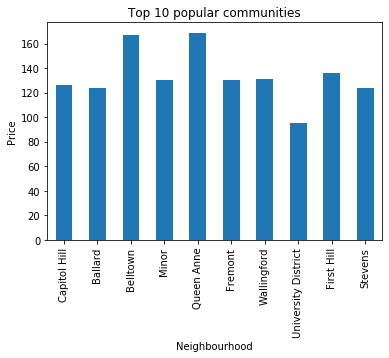

In [175]:
group1_count['mean_price'][:10].plot(kind='bar', legend=False)
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
plt.title('Top 10 popular communities')
plt.show()

### Find out Top 5 expensive neighbourhoods

In [177]:
group1_price = group1.sort_values(['mean_price'],ascending=False)
group1_price

,count,mean_price
neighbourhood,,
Fairmount Park,1,370.000000
Industrial District,3,245.000000
Portage Bay,14,241.428571
Westlake,12,197.000000
Alki,23,196.652174
...,...,...
Georgetown,7,77.000000
Rainier Beach,18,76.722222
Dunlap,13,75.461538


## ** Column change 
<p>Since there the top one expensive neighbourhood -- Fairmount Park only has one count, it would be too baised if I keep using this result.</p>
<p>Instead, I will groupby another column, 'neighbourhood_group_cleansed' that has no NaN value and grouped from a big picture. I think it makes more sense seeing different zones by using this generally cleansed neighbourhood groups.</p>

### Top 10 popular communities price using 'neighbourhood_group_cleansed' 

In [181]:
group_cleansed_neighb = df[['neighbourhood_group_cleansed', 'price']]
group_cleansed_neighb['neighbourhood_group_cleansed'].isnull().value_counts()

False    3818
Name: neighbourhood_group_cleansed, dtype: int64

In [189]:
group2 = group_cleansed_neighb.groupby(['neighbourhood_group_cleansed'], as_index=True).agg(count=('price','size'), mean_price=('price','mean'))
group2_count = group2.sort_values(['count'],ascending=False)
group2_count.head(10)

,count,mean_price
neighbourhood_group_cleansed,,
Other neighborhoods,794,119.968514
Capitol Hill,567,130.592593
Downtown,530,154.405660
Central Area,369,128.338753
Queen Anne,295,157.223729
Ballard,230,124.682609
West Seattle,203,141.359606
Rainier Valley,159,91.899371
University District,122,93.639344


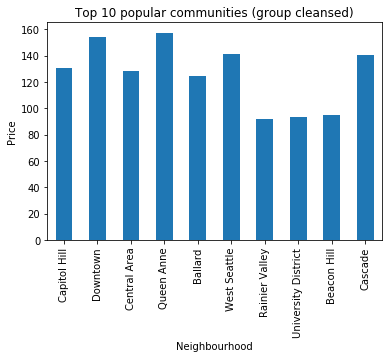

In [184]:
group2_count['mean_price'][1:11].plot(kind='bar', legend=False)
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
plt.title('Top 10 popular communities (group cleansed)')
plt.show()

### Top 5 most expensive neighbourhoods

In [188]:
group2_price = group2.sort_values(['mean_price'],ascending=False)
group2_price.head(10)

,count,mean_price
neighbourhood_group_cleansed,,
Magnolia,61,177.672131
Queen Anne,295,157.223729
Downtown,530,154.405660
West Seattle,203,141.359606
Cascade,89,140.101124
Capitol Hill,567,130.592593
Central Area,369,128.338753
Ballard,230,124.682609
Other neighborhoods,794,119.968514


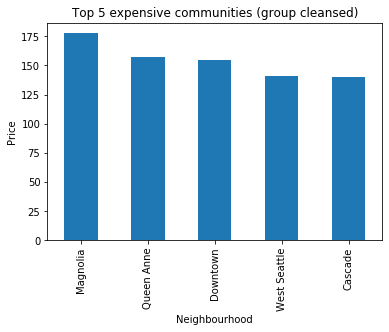

In [186]:
# Top 5 expensive communities (average price)
group2_price['mean_price'][:5].plot(kind='bar', legend=False)
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
plt.title('Top 5 expensive communities (group cleansed)')
plt.show()

## Break into field

In [33]:
len(df['transit'].unique())

2575

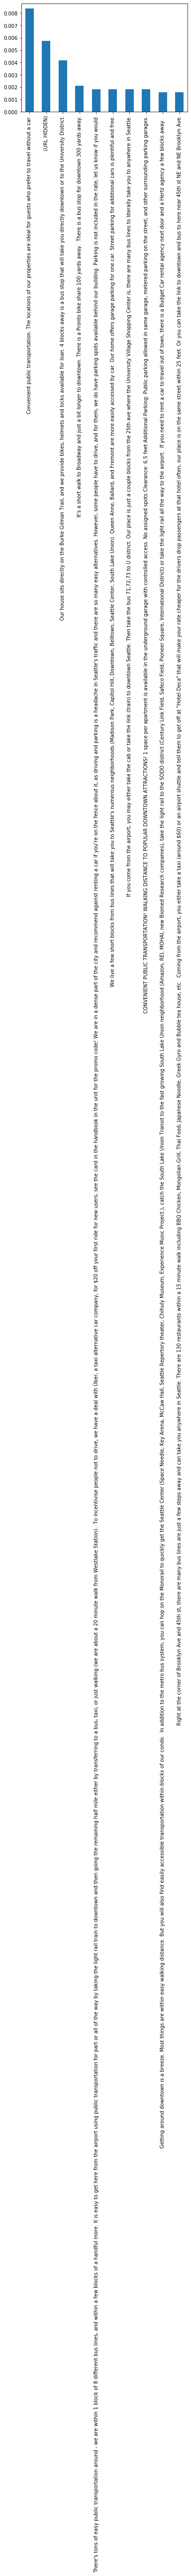

In [133]:
a = df['transit'].value_counts()
(a[:10]/df.shape[0]).plot(kind='bar')

Too much information in 'transit', so I gave up breaking it into field

### Host verification methods

In [6]:
len(df['host_verifications'].unique())

116

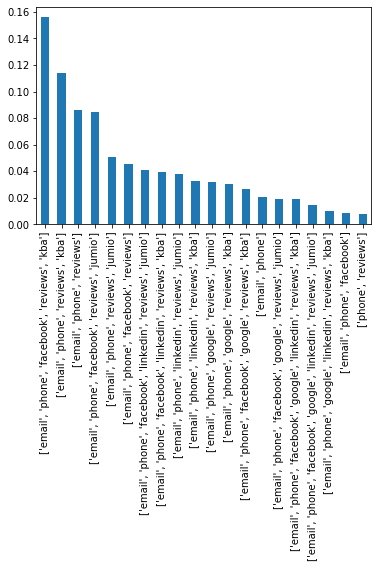

In [7]:
b = df['host_verifications'].value_counts()
(b[:20]/df.shape[0]).plot(kind='bar')

In [8]:
def total_count(df, col1, col2, look_for):
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [9]:
# summary of primary keys from 'host_verification'
possible_host_veri = ['email','phone', 'facebook','google','reviews','kba', 'jumio','linkedin']

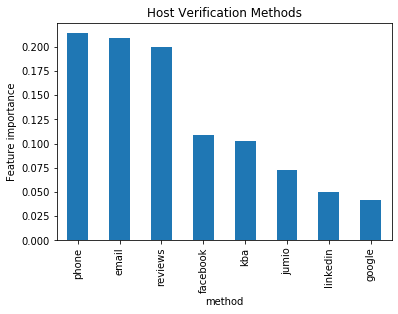

In [10]:
def clean_and_plot(column, possible_vals, title, plot=True):
    methods = column.value_counts().reset_index()
    methods.rename(columns={methods.columns[0]: 'method', methods.columns[1]:'count'}, inplace=True)
    methods_df = total_count(methods, 'method', 'count', possible_vals)
    
    methods_df.set_index('method', inplace=True)
    if plot:
        (methods_df/methods_df.sum())[:10].plot(kind='bar', legend=None);
        plt.title(title)
        plt.ylabel('Feature importance')
        plt.show()
    props_methods_df = methods_df/methods_df.sum()
    return props_methods_df

props_host_veri = clean_and_plot(df['host_verifications'], possible_host_veri, title='Host Verification Methods')

In [11]:
methods = df['host_verifications'].value_counts().reset_index()
methods.rename(columns={'index': 'method', 'host_verifications':'count'}, inplace=True)
methods_df = total_count(methods, 'method', 'count', possible_host_veri)
methods_df

,method,count
1,phone,3791
0,email,3706
4,reviews,3549
2,facebook,1928
5,kba,1816
6,jumio,1289
7,linkedin,891
3,google,745


### Amenities

In [12]:
len(df['amenities'].unique())

3284

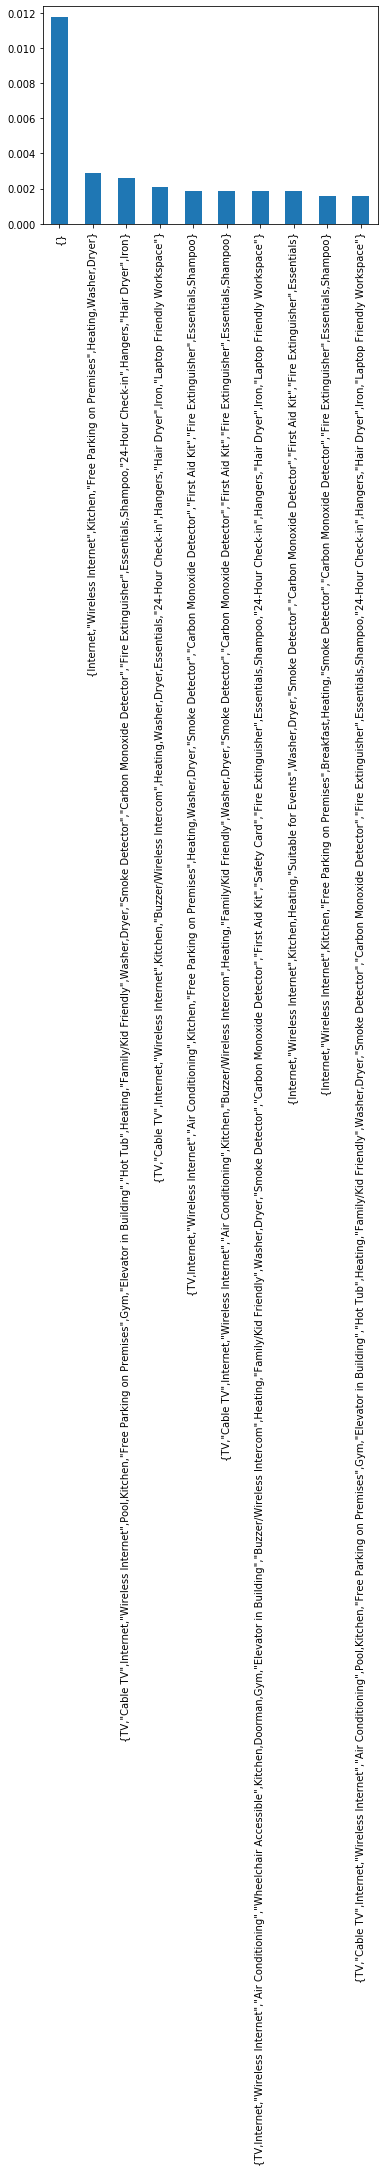

In [16]:
c = df['amenities'].value_counts()
(c[:10]/df.shape[0]).plot(kind='bar')

In [14]:
possible_amenities = ['TV', 'Cable TV','Internet','Wireless Internet','Pool','Kitchen',
                     'Free Parking on Premises','Gym','Elevator in Building','Hot Tub','Heating',
                     'Hair Dryer','Dryer','Wahser','First Aid Kit', 'Smoke Etector', 'Carbon Monixide Detector',
                     "Air Conditioning","Family/Kid Friendly","Safety Card","Fire Extinguisher",
                      'Essentials',"Pets Allowed",'Hangers','Iron',"Laptop Friendly Workspace",
                     "24-Hour Check-in","Buzzer/Wireless Intercom"]

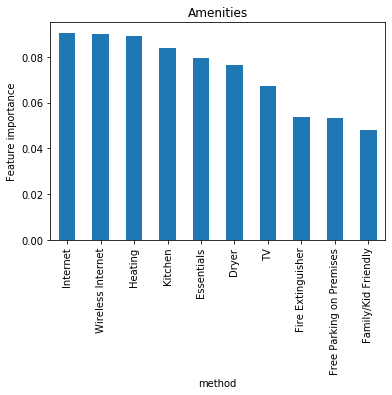

In [15]:
props_amenities = clean_and_plot(df['amenities'], possible_amenities, title='Amenities')

# Categorical factors & Rating vs. Price

In [193]:
df_roomtype_price = df[['property_type','room_type', 'price', 'bed_type',
                        'cancellation_policy','review_scores_rating']]

In [201]:
rate_proptype = df_roomtype_price.groupby(['property_type']).agg(rate=('review_scores_rating','mean'), price=('price','mean'), count=('room_type','size'))
rate_proptype.sort_values(['count'], ascending=False)

,rate,price,count
property_type,,,
House,94.833562,132.351414,1733
Apartment,93.977591,122.932670,1708
Townhouse,96.625000,129.457627,118
Condominium,95.318841,151.109890,91
Loft,95.454545,135.700000,40
Bed & Breakfast,95.730769,112.054054,37
Other,96.263158,94.681818,22
Cabin,96.238095,104.666667,21
Bungalow,97.666667,115.615385,13


In [202]:
rate_roomtype = df_roomtype_price.groupby(['room_type']).agg(rate=('review_scores_rating','mean'), price=('price','mean'), count=('room_type','size'))
rate_roomtype.sort_values(['count'], ascending=False)

,rate,price,count
room_type,,,
Entire home/apt,94.477647,155.843369,2541
Private room,94.802935,75.044828,1160
Shared room,93.228261,47.547009,117


In [203]:
rate_cancel = df_roomtype_price.groupby(['cancellation_policy']).agg(rate=('review_scores_rating','mean'), price=('price','mean'), count=('room_type','size'))
rate_cancel.sort_values(['count'], ascending=False)

,rate,price,count
cancellation_policy,,,
strict,94.251392,154.597036,1417
moderate,94.671958,114.775380,1251
flexible,94.810256,109.534783,1150


In [204]:
rate_bedtype = df_roomtype_price.groupby(['bed_type']).agg(rate=('review_scores_rating','mean'), price=('price','mean'), count=('room_type','size'))
rate_bedtype.sort_values(['count'], ascending=False)

,rate,price,count
bed_type,,,
Real Bed,94.541899,130.368882,3657
Futon,94.301587,72.824324,74
Pull-out Sofa,94.820513,77.276596,47
Airbed,93.944444,73.962963,27
Couch,95.375000,64.307692,13


## Correct data types

In [37]:
df['extra_people']=df['extra_people'].str.replace('$', '').astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df['cleaning_fee']=df['cleaning_fee'].str.replace('$', '').astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df['security_deposit']=df['security_deposit'].str.replace(',', '')
df['security_deposit']=df['security_deposit'].str.replace('$', '').astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
df['monthly_price']=df['monthly_price'].str.replace(',', '')
df['monthly_price']=df['monthly_price'].str.replace('$', '').astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
df['weekly_price']=df['weekly_price'].str.replace(',', '')
df['weekly_price']=df['weekly_price'].str.replace('$', '').astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
df['price']=df['price'].str.replace(',', '')
df['price']=df['price'].str.replace('$', '').astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
df['host_acceptance_rate']=df['host_acceptance_rate'].str.replace('%', '').astype('float')
df['host_response_rate']=df['host_response_rate'].str.replace('%', '').astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# correct the date format
df['host_since_date'] = pd.to_datetime(df['host_since'], yearfirst=True, errors='ignore')

### check if the data types are what I want

In [45]:
df['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [46]:
df['host_response_rate'].value_counts()

100.0    2371
90.0      165
80.0      104
99.0       78
88.0       66
50.0       52
94.0       46
67.0       41
75.0       32
89.0       32
86.0       30
98.0       28
96.0       28
70.0       25
97.0       21
60.0       20
83.0       20
92.0       18
93.0       18
33.0       14
40.0       12
63.0       11
71.0        8
95.0        8
78.0        8
91.0        5
43.0        4
76.0        3
25.0        3
64.0        3
87.0        3
17.0        2
82.0        2
57.0        2
58.0        2
31.0        1
55.0        1
81.0        1
56.0        1
53.0        1
38.0        1
30.0        1
68.0        1
69.0        1
65.0        1
Name: host_response_rate, dtype: int64

### plot the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4C5D93308>,
      dtype=object)

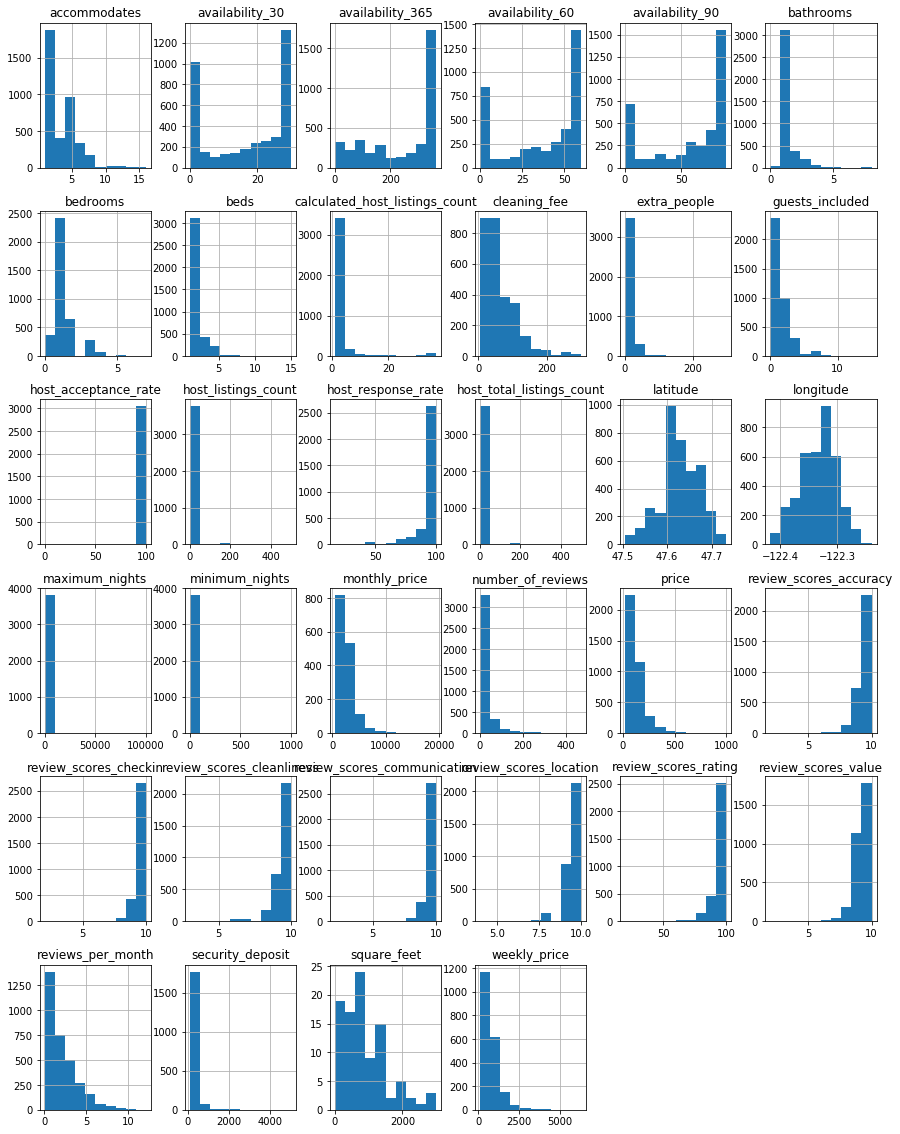

In [156]:
df.hist(figsize=[15,20])

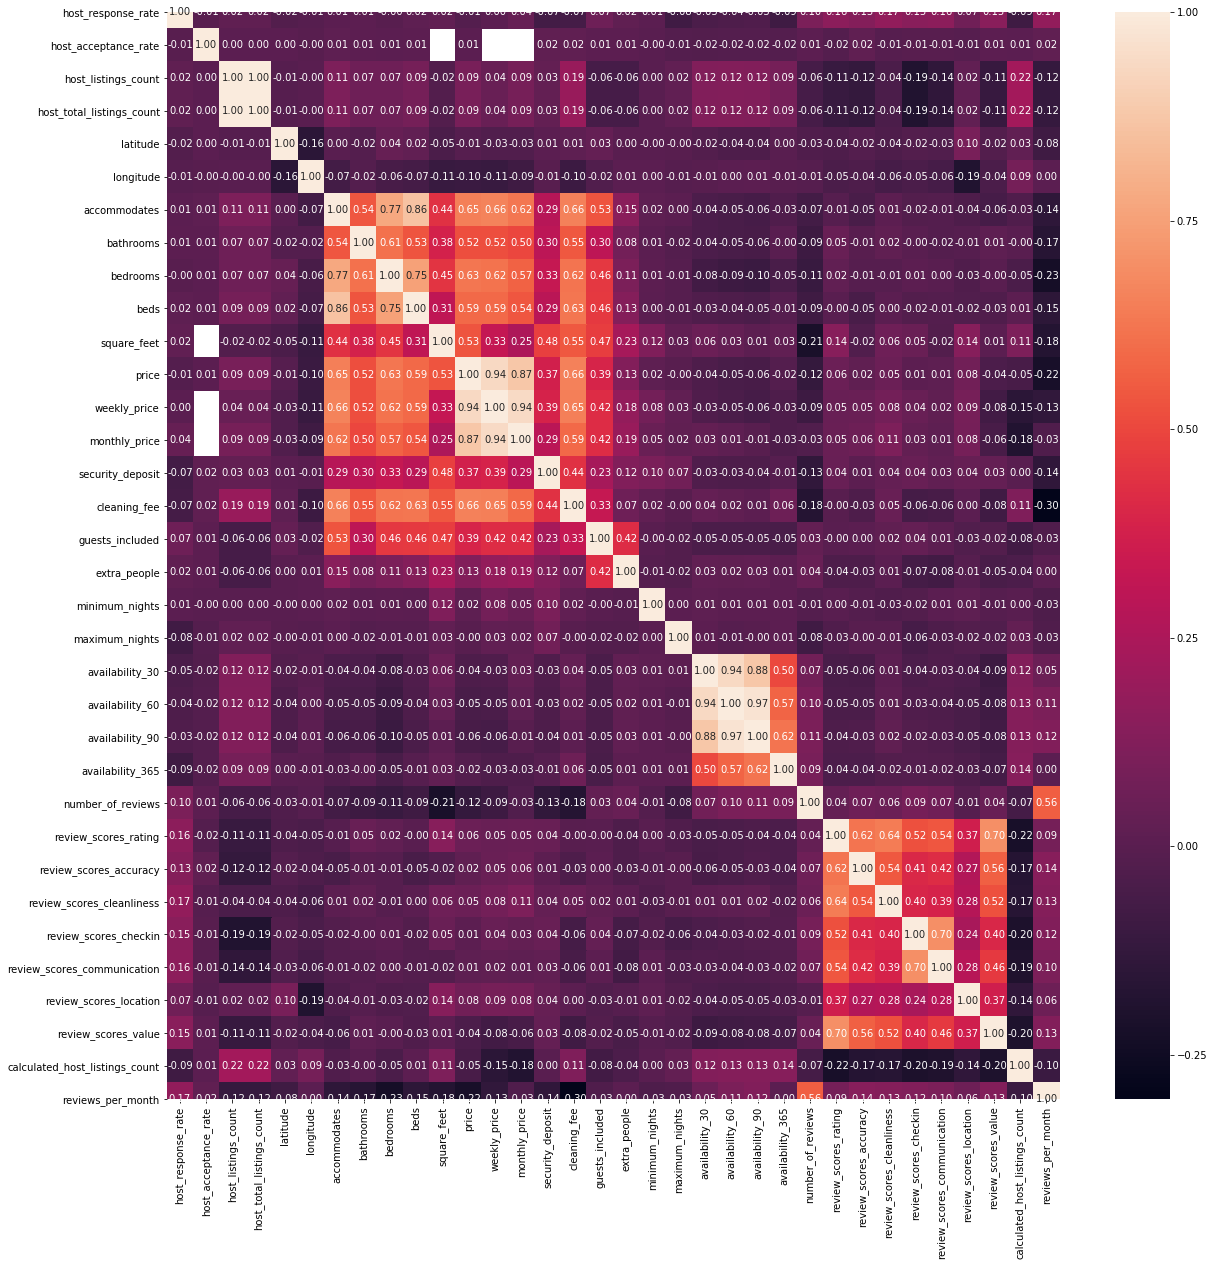

In [55]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

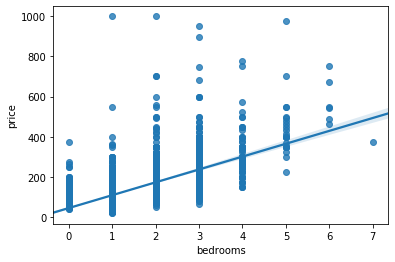

In [56]:
sns.regplot(x='bedrooms', y='price', data=df)

In [211]:
df.groupby(['bedrooms']).agg(price=('price','mean'), count=('price','size'))

,price,count
bedrooms,,
0.0,103.548387,372
1.0,95.706247,2417
2.0,174.062500,640
3.0,249.530035,283
4.0,313.695652,69
5.0,441.000000,24
6.0,578.166667,6
7.0,375.000000,1


In [228]:
df[df['bedrooms'].isnull()][['room_type','price']]

,room_type,price
1429,Entire home/apt,80.0
1492,Entire home/apt,200.0
1493,Entire home/apt,132.0
1853,Entire home/apt,95.0
2619,Entire home/apt,99.0
2915,Entire home/apt,75.0


In [213]:
df.groupby(['room_type','bedrooms']).agg(price=('price','mean'), count=('price','size'))

price  count
room_type       bedrooms                   
Entire home/apt 0.0       103.548387    372
                1.0       121.672807   1140
                2.0       174.062500    640
                3.0       249.530035    283
                4.0       313.695652     69
                5.0       441.000000     24
                6.0       578.166667      6
                7.0       375.000000      1
Private room    1.0        75.044828   1160
Shared room     1.0        47.547009    117

### Fill 'bedrooms' with the means according to 'room_type' and 'price'

In [233]:
df.at[1429,'bedrooms']=0.0
df.at[1492,'bedrooms']=2.0
df.at[1493,'bedrooms']=1.0
df.at[1853,'bedrooms']=0.0
df.at[2619,'bedrooms']=0.0
df.at[2915,'bedrooms']=0.0

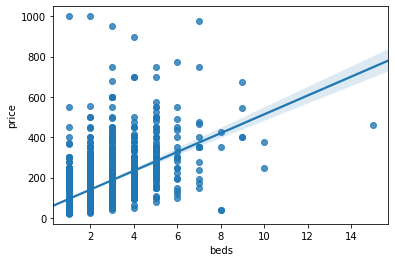

In [58]:
sns.regplot(x='beds', y='price', data=df)

In [241]:
df[df['beds'].isnull()][['room_type','price']]

,room_type,price
1961,Private room,280.0


In [242]:
df.groupby(['room_type','beds']).agg(price=('price','mean'), count=('price','size'))

price  count
room_type       beds                   
Entire home/apt 1.0   116.107376   1071
                2.0   146.205584    788
                3.0   198.464115    418
                4.0   237.945578    147
                5.0   308.986301     73
                6.0   312.857143     21
                7.0   392.642857     14
                8.0   387.500000      2
                9.0   504.250000      4
                10.0  312.500000      2
                15.0  461.000000      1
Private room    1.0    73.835763   1029
                2.0    79.274336    113
                3.0   112.538462     13
                4.0    93.500000      4
Shared room     1.0    46.475248    101
                2.0    53.272727     11
                3.0    52.000000      2
                4.0   100.000000      1
                8.0    39.500000      2

### Fill 'bedrooms' with the means according to 'room_type' and 'price'

In [243]:
df.at[1961,'beds']=3.0

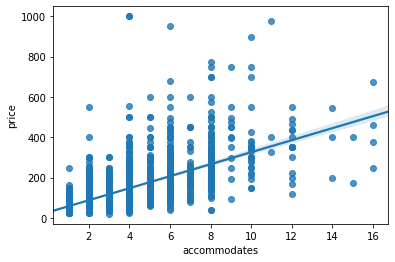

In [246]:
sns.regplot(x='accommodates', y='price', data=df)

In [250]:
df['square_feet'].isnull().value_counts()

True     3721
False      97
Name: square_feet, dtype: int64

too much NaN data, so I decided not to use 'square_feet' as a predict factor

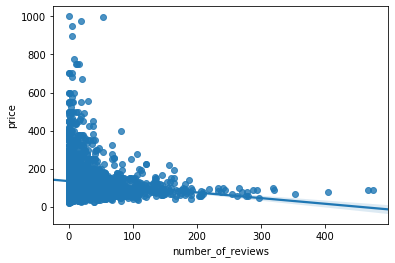

In [65]:
sns.regplot(x='number_of_reviews', y='price', data=df)

<p>The Airbnb size is the most important factor determining the price, as 'beds', 'square feet' and 'bedrooms' are the most related features to 'price'. These three factors also affect the accomendation capacity and the number of guest included, therefore the later two factors are the second most important features related to the price.</p>
<p>The number of reviews shows a sightly negative relationship (-0.12) with price, which may demonstrate that rooms with lower price are more popular than the luxury ones (> </p>


In [67]:
df['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

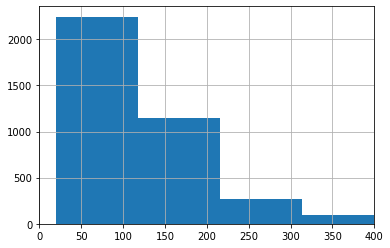

In [134]:
df['price'].hist()
plt.xlim(0,400)
plt.show()

In [73]:
price_less_Q4 = df[df['price']<=262.5]

In [251]:
df.to_csv("C:\\Data\\MeiData\\Udacity\\Data Scientist\\Blog Post\\Seattle\\clean_df.csv")